In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [51]:
df = pd.read_csv(r'E:/dane/^spx_d(2).csv')
df['Data'] = pd.to_datetime(df['Data'])
df = df[df['Data'] > pd.to_datetime('2011-01-25')]
df = df[df['Data'] < pd.to_datetime('2017-09-20')]
df['5DayClose'] = df['Zamkniecie'].shift(-5)
df['Year'] = df['Data'].dt.year
df['5DayReturn'] = (df['5DayClose'] - df['Otwarcie'])
df.reset_index(drop=True, inplace=True)
df.head()
df['FomcMeeting'] = 0

In [52]:
meets = [
        '2011-01-26','2011-03-15','2011-04-27','2011-06-22','2011-08-09','2011-09-21','2011-11-02',
        '2011-12-13',
        '2012-01-25','2012-03-13','2012-04-25','2012-06-20','2012-08-01','2012-09-13',
        '2012-10-24','2012-12-12',
        '2013-01-30','2013-03-20','2013-05-01','2013-06-19','2013-07-31','2013-09-18','2013-10-30',
        '2013-12-18',  
        '2014-01-29','2014-03-19','2014-04-30','2014-06-18','2014-07-30','2014-09-17','2014-10-29',
        '2014-12-17','2015-01-28','2015-03-18','2015-04-29','2015-06-17','2015-07-29',
        '2015-09-17','2015-10-28','2015-12-16','2016-01-27','2016-03-16','2016-04-27','2016-06-15',
        '2016-07-27','2016-09-21','2016-11-02','2016-12-14','2017-02-01','2017-03-15','2017-05-03',
        '2017-06-14','2017-07-26','2017-09-20']
meets2 = []
for meet in meets:
    meet = pd.to_datetime(meet)
    meets2.append(meet)
meets = meets2

In [53]:
j = 0
freshMeeting = 0
meeting = 0
for i in range(len(df)):
    j += 1
    if df.iloc[i, 0] in meets:
        j = 0
        freshMeeting = meets.index(df.iloc[i,0])
        meeting = df.iloc[i,0]    
    if freshMeeting + 1 < len(meets):
        nextMeeting = meets[freshMeeting + 1]
        days = np.busday_count(nextMeeting, df.iloc[i,0])
        if(days >= 0):
            j = 0
            meeting = nextMeeting
    df = df.set_value(i, 'DaysSinceFomc', j)
    df = df.set_value(i, "FomcMeeting", meeting)
df['Shifted'] = df['DaysSinceFomc'].shift(-1) 


In [54]:
df.to_csv("SPX_done.csv")


In [55]:
a = df.groupby('DaysSinceFomc')['5DayReturn'].mean()
b = df.groupby('DaysSinceFomc')['5DayReturn'].count()
a = a[a.index < 30]

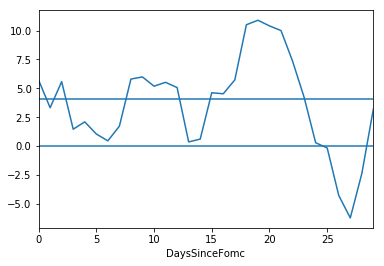

4.0671814903846135

In [56]:
a.plot()
plt.axhline(y=df['5DayReturn'].mean())
plt.axhline(y=0)
plt.show()
df['5DayReturn'].mean()

In [57]:
d19 = df['5DayReturn'][df['DaysSinceFomc'] == 19]
d9 = df['5DayReturn'][df['DaysSinceFomc'] == 18]
d4 = df['5DayReturn'][df['DaysSinceFomc'] == 4]
d30 = df['5DayReturn'][df['DaysSinceFomc'] == 33]
d27 = df['5DayReturn'][df['DaysSinceFomc'] == 27]
d14 = df['5DayReturn'][df['DaysSinceFomc'] == 14]

In [58]:
sum(d19 > 0) / len(d19)

0.69811320754716977

In [59]:
(d30 > 0).sum() / len(d30)

0.73684210526315785

In [60]:
sum(d4 > 0) / len(d4)

0.50943396226415094

In [38]:
d19.reset_index(inplace=True,drop=True)
d9.reset_index(inplace=True,drop=True)
d27.reset_index(inplace=True,drop=True)
d1.reset_index(inplace=True,drop=True)
d9.reset_index(inplace=True,drop=True)
d30.reset_index(inplace=True, drop=True)

NameError: name 'd1' is not defined

In [19]:
yearly = df2.groupby(['DaysSinceFomc','Year'])['5DayReturn'].mean()

In [18]:
df2 = df

In [20]:
yearly = pd.DataFrame(yearly)

In [21]:
yearly.mean()

5DayReturn    11.446322
dtype: float64

In [26]:
yearly

5DayReturn
DaysSinceFomc Year            
0.0           2011   18.117500
              2012   21.650000
              2013    9.796250
              2014    8.206250
              2015   -2.702500
              2016    7.720000
              2017  -15.056000
1.0           2011   23.347500
              2012   17.718750
              2013   20.297500
              2014  -11.386250
              2015   -9.707500
              2016    5.936250
              2017   20.150000
2.0           2011   16.683750
              2012   17.401250
              2013    8.115000
              2014  -35.428750
              2015  -33.933750
              2016    4.035000
              2017   25.364000
3.0           2011   11.592500
              2012   18.341250
              2013    6.728750
              2014   -3.223750
              2015  -33.602500
              2016  -32.105000
              2017   22.584000
4.0           2011  -14.803750
              2012   -3.747500
...                        ...
32.0          2016   54.203333
              2017   34.650000
33.0          2011  -36.030000
              2012   69.510000
              2013   -0.535000
              2014   49.970000
              2015   43.182500
              2016   38.373333
              2017   -0.485000
34.0          2011   22.010000
              2012   79.110000
              2015  -83.210000
              2016   78.470000
              2017    8.230000
35.0          2011   26.000000
              2012   94.050000
              2016  104.040000
              2017         NaN
36.0          2011   35.010000
              2012   13.110000
              2016   79.570000
              2017         NaN
37.0          2011   29.850000
              2012   14.550000
              2016   25.070000
              2017         NaN
38.0          2011   41.270000
              2012  -72.890000
              2016    3.390000
              2017         NaN

[259 rows x 1 columns]

In [31]:
d19.mean()

34.562075471698236

In [24]:
yearly

5DayReturn
DaysSinceFomc Year            
27.0          2011  -86.991429
              2012   33.653750
              2013    4.613750
              2014  -26.892857
              2015  -19.600000
              2016  -44.201429
              2017   -2.136667